In [1]:

import pandas as pd

# 엑셀 파일 불러오기
uv_df = pd.read_csv(r'C:\Users\USER\Documents\withskin_project\uv_summary.csv')

# 데이터 확인
print(uv_df.head())

               파일명    포피린 비율      피지비율  피지수     피지면적
0    uv_0523_1.png  0.000014  0.000372   12  11113.0
1   uv_0523_10.png  0.000188  0.000416    2   1959.0
2  uv_0523_100.png  0.012682  0.001107   51  23452.0
3  uv_0523_101.png  0.026985  0.000959   28  22649.0
4  uv_0523_102.png  0.000400  0.000039   21  26917.0


In [2]:
# 열의 평균 계산
mean_value = uv_df['포피린 비율'].mean()

# 열의 최솟값 계산
min_value = uv_df['포피린 비율'].min()

# 열의 최댓값 계산
max_value = uv_df['포피린 비율'].max()

# 열의 사분위수 계산
quantiles = uv_df['포피린 비율'].quantile([0.25, 0.5, 0.75, 0.01])

print("Mean:", mean_value)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("25th Percentile:", quantiles[0.25])
print("50th Percentile (Median):", quantiles[0.5])
print("75th Percentile:", quantiles[0.75])

Mean: 0.0026701610982786967
Minimum: 0.0
Maximum: 0.0269847393689986
25th Percentile: 0.0001456467234688
50th Percentile (Median): 0.0014330597255599
75th Percentile: 0.0034762409979423


In [91]:
import pandas as pd

# DataFrame에서 특정 컬럼 선택
column_name = '포피린 비율'  # 점수화할 컬럼의 이름
selected_column = uv_df[column_name]

# 점수 계산
scores = (1 - selected_column)

# 스케일링된 결과를 원본 DataFrame에 반영
uv_df[column_name] = scores

# 결과 출력
uv_df

,파일명,포피린 비율,피지비율,피지수,피지면적
0,uv_0523_1.png,0.999986,0.000372,12,11113.0
1,uv_0523_10.png,0.999812,0.000416,2,1959.0
2,uv_0523_100.png,0.987318,0.001107,51,23452.0
3,uv_0523_101.png,0.973015,0.000959,28,22649.0
4,uv_0523_102.png,0.999600,0.000039,21,26917.0
...,...,...,...,...,...
324,uv_95.png,0.992452,0.009351,45,58472.0
325,uv_96.png,0.986502,0.004417,21,11021.0
326,uv_97.png,0.995203,0.015143,57,47290.0
327,uv_98.png,0.996338,0.010635,52,36450.0


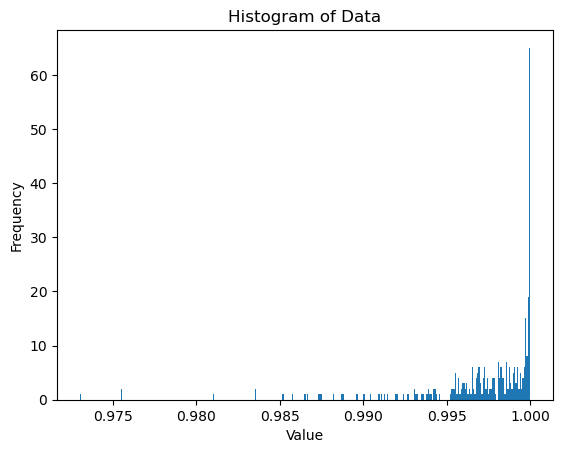

In [28]:
import matplotlib.pyplot as plt

data = uv_df['포피린 비율']  # 데이터 리스트
num_bins = len(data)

plt.hist(data, bins=num_bins)  # 데이터를 10개의 구간으로 나누어 히스토그램을 그립니다.
plt.xlabel('Value')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
plt.title('Histogram of Data')  # 그래프 제목 설정

plt.show()

In [94]:
# 열의 평균 계산
mean_value = uv_df['포피린 비율'].mean()

# 열의 최솟값 계산
min_value = uv_df['포피린 비율'].min()

# 열의 최댓값 계산
max_value = uv_df['포피린 비율'].max()

# 열의 사분위수 계산
quantiles = uv_df['포피린 비율'].quantile([0.25, 0.5, 0.75, 0.01])

print("Mean:", mean_value)
print("Minimum:", min_value)
print("Maximum:", max_value)
print("25th Percentile:", quantiles[0.25])
print("50th Percentile (Median):", quantiles[0.5])
print("75th Percentile:", quantiles[0.75])

Mean: 0.9973298389017216
Minimum: 0.9730152606310014
Maximum: 1.0
25th Percentile: 0.9965237590020577
50th Percentile (Median): 0.9985669402744402
75th Percentile: 0.9998543532765312


In [125]:
# 하위 1% 점수를 기준으로 두었을 때 p1 이하인 포피린 비율의 값은 1점으로 나타나는 이슈가 있다.
# 포피린의 면적이 얼굴의 절반인 경우(value = 0.5) 사람의 점수는 1점으로 나타난다. 

def calculate_score(value):
    # Percentiles
    p1 = 0.9816995134602196
    p25 = 0.9965237590020577
    p50 = 0.9985669402744402
    p75 = 0.9998543532765312
    
    # Score ranges
    if value <= p1:
        return 1
    elif p1 < value <= p25:
        return 1 + (value - p1) / (p25 - p1) * 24
    elif p25 < value <= p50:
        return 26 + (value - p25) / (p50 - p25) * 24
    elif p50 < value <= p75:
        return 51 + (value - p50) / (p75 - p50) * 24
    else:
        return 76 + (value - p75) / (1 - p75) * 24

# 주어진에 대한 점수를 계산
value = 0.99  # 예시값
score = calculate_score(value)
print("Score: ", score)

Score:  14.438233763229285


In [124]:
# 아래는 하위 1프로의 기준을 두지 않고, 코드를 실행한 결
# 포피린의 면적이 얼굴의 절반인 경우(value = 0.5) 사람의 점수는 13점으로 나타난다. 

def calculate_score(value):
    # Percentiles
    p25 = 0.9965237590020577
    p50 = 0.9985669402744402
    p75 = 0.9998543532765312
    
    # Score ranges
    if value <= p25:
        return 1 + (value - 0) / (p25 - 0) * 24
    elif p25 < value <= p50:
        return 26 + (value - p25) / (p50 - p25) * 24
    elif p50 < value <= p75:
        return 51 + (value - p50) / (p75 - p50) * 24
    else:
        return 76 + (value - p75) / (1 - p75) * 24

# 주어진 값에 대한 점수를 계산
value = 0.99 # 예시값
score = calculate_score(value)
print("Score: ", score)

Score:  24.842883609512555


In [ ]:
#따라서 두번째 코드를 계산식으로 활용한다.